## Analysing Homeless Population 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

uploading data 

In [25]:
homeless_population = pd.read_excel("../../Data/homeless_population_usafacts.xlsx")
homeless_population.head()

,Years,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Homeless population (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,623788.0,621553.0,590364.0,576450.0,564708.0,549928.0,550996.0,552830.0,567715.0,580466.0
1,By living situation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheltered (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,392316.0,390155.0,394698.0,401051.0,391440.0,373571.0,360867.0,358363.0,356422.0,354386.0
3,By family arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Individuals (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205834.0,199159.0,203127.0,209148.0,205616.0,198008.0,193144.0,194340.0,199531.0,199478.0


## Wrangling Data
dropping any empty columns and NAs.

In [26]:
homeless_population.drop([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004], axis=1, inplace = True)
homeless_population.head()

,Years,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Homeless population (1),754147.0,759101.0,647258.0,639784.0,630227.0,637077.0,623788.0,621553.0,590364.0,576450.0,564708.0,549928.0,550996.0,552830.0,567715.0,580466.0
1,By living situation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheltered (1),415366.0,427971.0,391401.0,386361.0,403308.0,403543.0,392316.0,390155.0,394698.0,401051.0,391440.0,373571.0,360867.0,358363.0,356422.0,354386.0
3,By family arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Individuals (1),NaN,224293.0,213073.0,204855.0,215995.0,212218.0,205834.0,199159.0,203127.0,209148.0,205616.0,198008.0,193144.0,194340.0,199531.0,199478.0


In [29]:
homeless_population2 = homeless_population.dropna()
homeless_population2.head()

,Years,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Homeless population (1),754147.0,759101.0,647258.0,639784.0,630227.0,637077.0,623788.0,621553.0,590364.0,576450.0,564708.0,549928.0,550996.0,552830.0,567715.0,580466.0
2,Sheltered (1),415366.0,427971.0,391401.0,386361.0,403308.0,403543.0,392316.0,390155.0,394698.0,401051.0,391440.0,373571.0,360867.0,358363.0,356422.0,354386.0
6,Unsheltered (1),338781.0,331130.0,255857.0,253423.0,226919.0,233534.0,231472.0,231398.0,195666.0,175399.0,173268.0,176357.0,190129.0,194467.0,211293.0,226080.0
8,Individuals (1),223027.0,228287.0,199627.0,199670.0,176136.0,182922.0,181779.0,182997.0,165047.0,151041.0,152806.0,157204.0,173441.0,178077.0,196514.0,209413.0
9,People in families with childr...,115754.0,102843.0,56230.0,53753.0,50783.0,50612.0,49693.0,48401.0,30619.0,24358.0,20462.0,19153.0,16688.0,16390.0,14779.0,16667.0


In [21]:
homeless_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   81 non-null     object 
 1   2005    5 non-null      float64
 2   2006    7 non-null      float64
 3   2007    58 non-null     float64
 4   2008    58 non-null     float64
 5   2009    58 non-null     float64
 6   2010    58 non-null     float64
 7   2011    58 non-null     float64
 8   2012    58 non-null     float64
 9   2013    58 non-null     float64
 10  2014    58 non-null     float64
 11  2015    72 non-null     float64
 12  2016    72 non-null     float64
 13  2017    73 non-null     float64
 14  2018    73 non-null     float64
 15  2019    73 non-null     float64
 16  2020    73 non-null     float64
dtypes: float64(16), object(1)
memory usage: 10.9+ KB


In [24]:
homeless_population.Years=homeless_population.Years.astype(int)

ValueError: invalid literal for int() with base 10: 'Homeless population'

## testing for Linearity and Normality

C:\Users\hanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Homeless population'

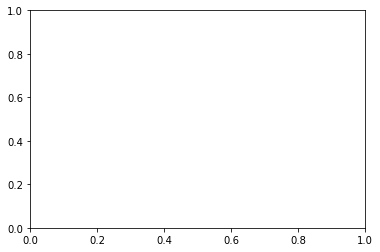

In [23]:
sns.distplot(homeless_population)